In [28]:
%matplotlib inline

from modsim import *
import math

In [29]:
# Import relevant units

m = UNITS.meter
kg = UNITS.kilogram
s = UNITS.second
N = UNITS.newton
cm = UNITS.centimeter
gm = UNITS.gram
mm = UNITS.millimeter
degree = UNITS.degree

In [155]:
# Set initial conditions.  These conditions will be used in make_system to generate a system.

condition = Condition(y=0, #*m, 
                      g=9.8, #*m/s**2, 
                      diameter=4, #*cm, 
                      rho_air=1.2, #*kg/m**3, 
                      C_d=0.75, 
                      velocity=0, #*m/s,
                      v_exhaust=1000, # * m/s,
                      duration=100, #*s, 
                      engineSA=4.5234, #*cm**2,
                      m_engine=52.0159, #*gm,
                      m_rocket=50, #*gm,
                      rho_fuel=1.6426, #*gm/cm**3,
                      burnRate=1, #*mm/s,
                      thetaCone=75) #*degree)

In [156]:
# Takes in an initial condition and generates a full system

def make_system(condition):
    unpack(condition)
    vy = velocity
    init = State(m_engine=m_engine,y=y,vy=vy)
    r = diameter/2
    h = r*math.tan(thetaCone)
    coneSA = 3.14159 * r * (r + sqrt(r*r + h*h))
    ts = linspace(0,duration,101)
    
    return System(init=init,
                  g=g,
                  rho_air=rho_air,
                  C_d=C_d,
                  engineSA=engineSA,
                  m_engine=m_engine,
                  m_rocket=m_rocket,
                  rho_fuel=rho_fuel,
                  burnRate=burnRate,
                  ts=ts,
                  coneSA=coneSA,
                  v_exhaust=v_exhaust)

In [159]:
# Slope Function for OdeInt later

def slope_func(state,t,system):
    unpack(system)
    m_engine, y, vy = init
    m = m_rocket + m_engine
    m_dot = rho_fuel * engineSA * burnRate
    
    f_drag = rho_air * C_d * vy*vy * coneSA / 2
    a_drag = f_drag / m
    print(f_drag)
    #print(g)
    ay = (v_exhaust * m_dot) / m - g - a_drag
    
    if vy < 0:
        vy = 0
    
    return -1*m_dot,vy, ay

In [160]:
system = make_system(condition)
slope_func(0,system)

TypeError: slope_func() missing 1 required positional argument: 'system'

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


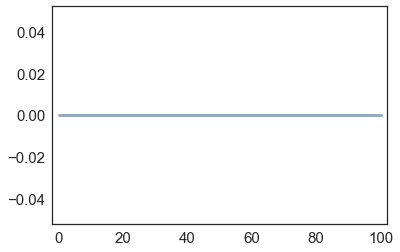

In [161]:
system = make_system(condition)
run_odeint(system,slope_func)
plot(system.results.y)

In [162]:
system.results

,m_engine,y,vy
0.0,52.015900,0.0,0.000000
1.0,44.585763,0.0,63.033125
2.0,37.155626,0.0,126.066251
3.0,29.725489,0.0,189.099376
4.0,22.295353,0.0,252.132502
5.0,14.865216,0.0,315.165627
6.0,7.435079,0.0,378.198753
7.0,0.004942,0.0,441.231878
8.0,-7.425195,0.0,504.265003
9.0,-14.855332,0.0,567.298129
